# LEAD SCORING CASE STUDY

## PROBLEM STATEMENT

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of the Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1936]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1) READING AND UNDERSTANDING THE DATA

In [1937]:
# Importing the data set 
leads = pd.read_csv('C:\\Users\\asus\\Downloads\\Lead Scoring Case Study\\Lead Scoring Assignment\\Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1938]:
# Lets check the shape of data set 
leads.shape

(9240, 37)

**There are 9240 rows and 37 columns in the data set.**

In [1939]:
# Lets check the information about the data types of all the attributes
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**Most of the attributes have object data type. Also, there are some attributes having int64 and float64 data types. We can see that, there are null values present in some columns.**

In [1940]:
# Checking the statistical distribution of the data
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


**There are no outliers present in the data set as we can see from above statistical distribution.**

### 2) CLEANING THE DATA AND PERFORMING EDA 

In [1941]:
# Lets check the null values present in each column
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [1942]:
# # Lets check the value count of each of the element in 'Specialization' column
leads.Specialization.value_counts(normalize=True)*100

Select                               24.891054
Finance Management                   12.509613
Human Resource Management            10.869008
Marketing Management                 10.740836
Operations Management                 6.447065
Business Administration               5.165342
IT Projects Management                4.691105
Supply Chain Management               4.473212
Banking, Investment And Insurance     4.332223
Travel and Tourism                    2.601897
Media and Advertising                 2.601897
International Business                2.281466
Healthcare Management                 2.037939
Hospitality Management                1.461164
E-COMMERCE                            1.435529
Retail Management                     1.281723
Rural and Agribusiness                0.935658
E-Business                            0.730582
Services Excellence                   0.512689
Name: Specialization, dtype: float64

**We can see from above count distribution of 'Specialization' column that, there are 25% values assigned to 'Select' which is as equivalent to the 'Null'. Lets check this for another categorical column.**

In [1943]:
# Checking the value count of 'City' column
leads.City.value_counts(normalize=True)*100

Mumbai                         41.202046
Select                         28.759591
Thane & Outskirts               9.616368
Other Cities                    8.772379
Other Cities of Maharashtra     5.843990
Other Metro Cities              4.859335
Tier II Cities                  0.946292
Name: City, dtype: float64

**29% of the values from 'City' column are assigned to 'Select'. We have to replace this level of 'Select' with 'Null' for all categorical columns.**

In [1944]:
# Replacing the 'Select' with 'Null' and checking the data again
leads = leads.replace('Select', np.nan)
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1945]:
# Checking the value count of each of the element in 'Specialization' column again
leads.Specialization.value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

In [1946]:
# Checking the value count of 'City' column again
leads.City.value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

**From above information we can see that, all the 'Select' values are replaced by null values in the data set. Now, lets check the overall null count for each of the column of data set again.**

In [1947]:
# Checking the % null values present in each column
leads.isnull().sum()/len(leads.index)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

**The columns containing null values greater than 45% need to drop as adding them into analysis does not make sense coz most of the values are unknown. Also the columns 'Prospect ID' and 'Lead Number' describe the unique ID and lead number assigned to each customer. Putting them into analysis will not give further insights, so it is better to drop these columns.**

In [1948]:
# Dropping the columns that we dont need in further analysis
leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

columns = leads.columns

for i in columns:
    if ((leads[i].isnull().sum()/len(leads.index)*100) >= 45):
        leads.drop(i, axis=1, inplace=True)

In [1949]:
# Checking the % null values present in each column again 
leads.isnull().sum()/len(leads.index)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

**The columns having null values greater than 45% are dropped. Still, there are some columns that contain null values. Lets check those columns one by one.**

In [1950]:
# Checking the value counts of column 'Country'
leads.Country.value_counts(dropna=False, normalize=True)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

**We can see, there are 70% values in the data set that have assigned country India, 26% values assigned to null and the occurences of all other countries are negligible. So, when we replace the null values in Country column with the most occurred value i.e India, it may not be suitable for analysis due to the biased condition. Therefore we have to drop the Counrty column.**

In [1951]:
# Lets drop the column 'Country' and check the general information
leads.drop(['Country'], axis=1, inplace=True)

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 5860 

In [1952]:
# Checking the column 'Specialization' for its value counts
leads.Specialization.value_counts(dropna=False, normalize=True)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

**Lets impute the missing values in 'Specialization' column with 'Not Specified' coz most of the customers have not specified their specialization. This column is important for further analysis.**

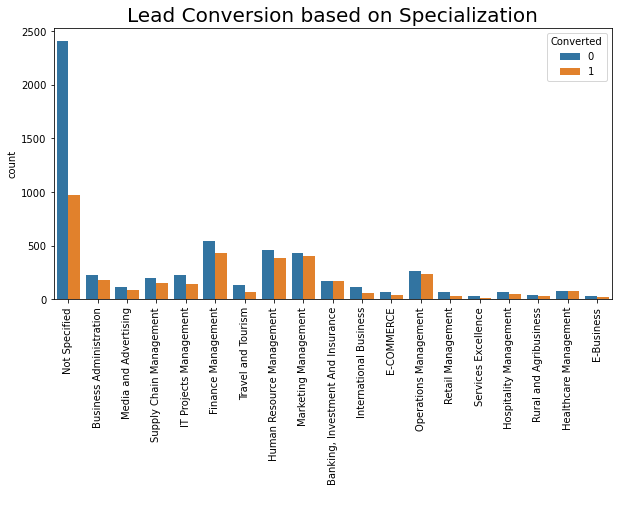

In [1953]:
# Imputing the null values in 'Specialization' column with 'Not Specified' and visualizing its distribution w.r.t target column
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

plt.figure(figsize=[10,5])

sns.countplot(leads.Specialization, hue=leads.Converted)
plt.title('Lead Conversion based on Specialization', fontdict={'fontsize':20})
plt.xlabel(' ')
plt.xticks(rotation=90)
plt.show()

**Most of the leads that have converted have not mentioned their specializetion. The managment have higher number of leads converted.**

In [1954]:
# Checking the information about the data set after imputing the column 'Specialization'
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 9240 

**The values are imputed in column 'Specialization'.**

In [1955]:
# Lets move to the next column 'What is your current occupation' and check its value counts
leads['What is your current occupation'].value_counts(dropna=False, normalize=True)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

**Most of the leads visited to the website are Unemployed. 30% null values are present in above column. Lets impute the null values from 'What is your current occupation' column with 'Not Specified'.**

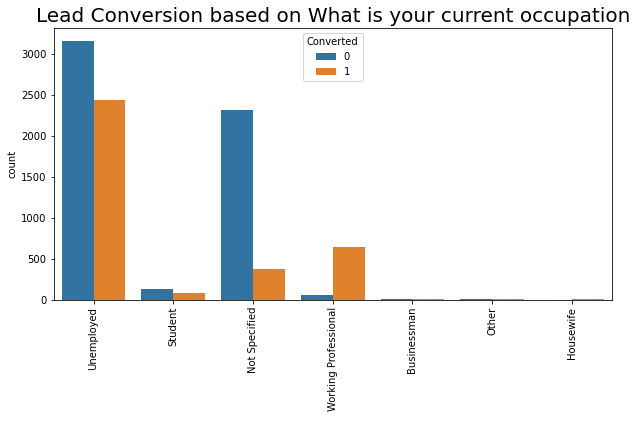

In [1956]:
# Imputing the null values in 'What is your current occupation' column with 'Not Specified' and visualizing its distribution w.r.t target column
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Not Specified')

plt.figure(figsize=[10,5])

sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
plt.title('Lead Conversion based on What is your current occupation', fontdict={'fontsize':20})
plt.xlabel(' ')
plt.xticks(rotation=90)
plt.show()

**Most of the leads converted are unemployed and some are working professionals. Some leads that are converted have not specified their occupation type. Housewife, buisnessman, students are may not be converted to join the course.**

In [1957]:
# Checking the value counts of the column 'What matters most to you in choosing a course'
leads['What matters most to you in choosing a course'].value_counts(dropna=False, normalize=True)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

**The main motto behind taking this course is 'Better Career Prospects' selected by the customer mostly. 30% customers have not specified their motive of choosing the course therefore occured as null. Imputing this with the most common value in the column will create biased condition. Therefore dropping this column is better option.**

In [1958]:
# Dropping the column 'What matters most to you in choosing a course' and check the general information
leads.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9137 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [1959]:
# Now check the column 'Tags'
leads.Tags.value_counts(dropna=False, normalize=True)*100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

**The column 'Tags' specifies the current status of the lead. As we can see, the tag assigned to most of the customer is null i.e not specified. We will impute these null values with 'Not Specified'.**

In [1960]:
# Changing the null values in column 'Tags' with 'Not Specified'
leads['Tags'] = leads['Tags'].replace(np.nan, 'Not Specified')

In [1961]:
# The next column to check is 'City'
leads.City.value_counts(normalize=True, dropna=False)*100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

**The null values from 'City' column are imputed with the most common value in the column i. e Mumbai.**

In [1962]:
# Imputing the null values from 'City' column and checking the information 
leads['City'] = leads['City'].replace(np.nan, 'Mumbai')

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9137 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [1963]:
# Checking the null values present in each column again 
leads.isnull().sum()

Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                               103
Specialization                                0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses        0
Tags                                          0
Update me on Supply Chain Content       

**There are 4 columns that still contain some null values. Lets check the value counts of those columns.**

In [1964]:
# Checking the value count of the column 'Lead Source'
leads['Lead Source'].value_counts(normalize=True, dropna=False)*100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

**We will replace the null values from the column 'Lead Source' with 'Others'. The column specifies the source of the customer for finding the course. Also we will replace 'google' with 'Google' and 'Social Media' with 'Facebook'.**

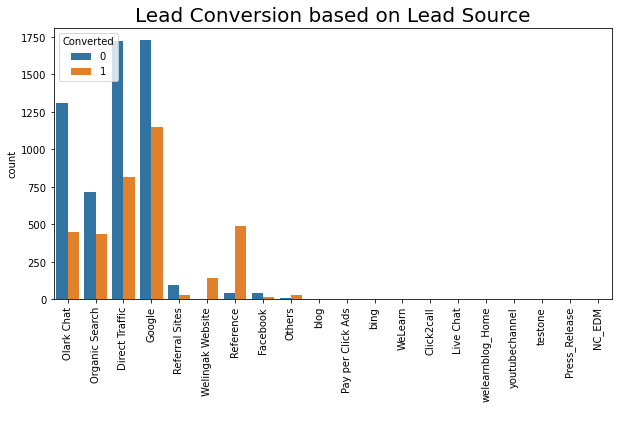

In [1965]:
# Replacing the null values in 'Lead Source' column and visualizing its distribution w.r.t target column
leads['Lead Source'] = leads['Lead Source'].replace(np.nan, 'Others')

leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')
leads['Lead Source'] = leads['Lead Source'].replace('Social Media', 'Facebook')

plt.figure(figsize=[10,5])

sns.countplot(leads['Lead Source'], hue=leads.Converted)
plt.title('Lead Conversion based on Lead Source', fontdict={'fontsize':20})
plt.xlabel(' ')
plt.xticks(rotation=90)
plt.show()

**Most of the leads generated are from Google and Direct Traffic. The lead conversion rate from the source Google is highest followed by Direct Traffic. Focussing on these sources like Google, Direct Traffic, Olark chat, Organic Search may help to get better lead conversion rate.**

In [1966]:
# Checking the % null values present in each column
leads.isnull().sum()/len(leads.index)*100

Lead Origin                                 0.000000
Lead Source                                 0.000000
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.

**We left with 3-4% of null values present in our data set. Removing the rows will not affect the model. Therefore we will drop the null values.**

In [1967]:
# Dropping the null values from the data set and checking the null count
leads = leads.dropna()

leads.isnull().sum()/len(leads.index)*100

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

**Now there are no null values present in data set.**

In [1968]:
# Checking the value counts of columns 'Last Activity' and 'Last Notable Activity'
print(leads['Last Activity'].value_counts(normalize=True)*100)

print()

print(leads['Last Notable Activity'].value_counts(normalize=True)*100)

Email Opened                    37.756783
SMS Sent                        30.077996
Olark Chat Conversation         10.677799
Page Visited on Website          7.030649
Converted to Lead                4.701747
Email Bounced                    3.427442
Email Link Clicked               2.933099
Form Submitted on Website        1.274305
Unreachable                      0.988685
Unsubscribed                     0.670109
Had a Phone Conversation         0.274635
View in browser link Clicked     0.065912
Approached upfront               0.054927
Email Received                   0.021971
Email Marked Spam                0.021971
Visited Booth in Tradeshow       0.010985
Resubscribed to emails           0.010985
Name: Last Activity, dtype: float64

Modified                        35.922223
Email Opened                    31.055696
SMS Sent                        23.860266
Page Visited on Website          3.493354
Olark Chat Conversation          2.010326
Email Link Clicked               1.9004

In [1969]:
# Replacing the values that are less than 1% with 'Non_IMP_Activity' in 'Last Activity' column and 'Non_IMP_Notable_Activity'
# in 'Last Notable Activity' column

leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront', 'View in browser link Clicked',
       'Email Marked Spam', 'Email Received', 'Resubscribed to emails', 'Visited Booth in Tradeshow'], 'Non_IMP_Activity')


leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation', 'Email Marked Spam', 'Unreachable', 'Unsubscribed', 'Email Bounced', 'Resubscribed to emails',
       'View in browser link Clicked', 'Approached upfront', 'Form Submitted on Website', 'Email Received'], 'Non_IMP_Notable_Activity')

In [1970]:
# Checking the data types of the columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9103 non-null   object 
 1   Lead Source                               9103 non-null   object 
 2   Do Not Email                              9103 non-null   object 
 3   Do Not Call                               9103 non-null   object 
 4   Converted                                 9103 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9103 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9103 non-null   object 
 9   Specialization                            9103 non-null   object 
 10  What is your current occupation     

In [1971]:
# Lets create a list of categorical variables to see the value counts for each of that variable

cat_cols = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
           
           'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
           
           'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']

for i in cat_cols:
    print(i)
    print(leads[i].value_counts(normalize=True, dropna=False)*100)
    print('*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*')

Do Not Email
No     92.046578
Yes     7.953422
Name: Do Not Email, dtype: float64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Do Not Call
No     99.978029
Yes     0.021971
Name: Do Not Call, dtype: float64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Search
No     99.846205
Yes     0.153795
Name: Search, dtype: float64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Magazine
No    100.0
Name: Magazine, dtype: float64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Newspaper Article
No     99.978029
Yes     0.021971
Name: Newspaper Article, dtype: float64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
X Education Forums
No     99.989015
Yes     0.010985
Name: X Education Forums, dtype: float64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Newspaper
No     99.989015
Yes     0.010985
Name: Newspaper, dtype: float64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Digital Advertisement
No     99.956058
Yes     0.043942
Name: Digital Advertisement, dtype: float64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Through Recommendations
No     99.

**All the categorical columns except 'A free copy of Mastering The Interview' and 'Last Notable Activity' will create baised condition. We will not require those columns for further analysis. Therefore, we will drop those columns.**

In [1972]:
# Popping out the cloumns 'A free copy of Mastering The Interview' and 'Last Notable Activity' from cat_cols
cat_cols.pop()
cat_cols.pop(-1)

cat_cols

['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [1973]:
# Dropping the cat_cols and checking the information
leads.drop(cat_cols, axis=1, inplace=True)

leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Converted                               9103 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9103 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9103 non-null   object 
 7   Specialization                          9103 non-null   object 
 8   What is your current occupation         9103 non-null   object 
 9   Tags                                    9103 non-null   object 
 10  City                                    9103 non-null   obje

**We left with 13 columns in our data set. Lets make some insights from these columns.**

In [1974]:
# Making a list of categorical and numerical columns
cat_cols1 = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags',
            
            'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']

num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

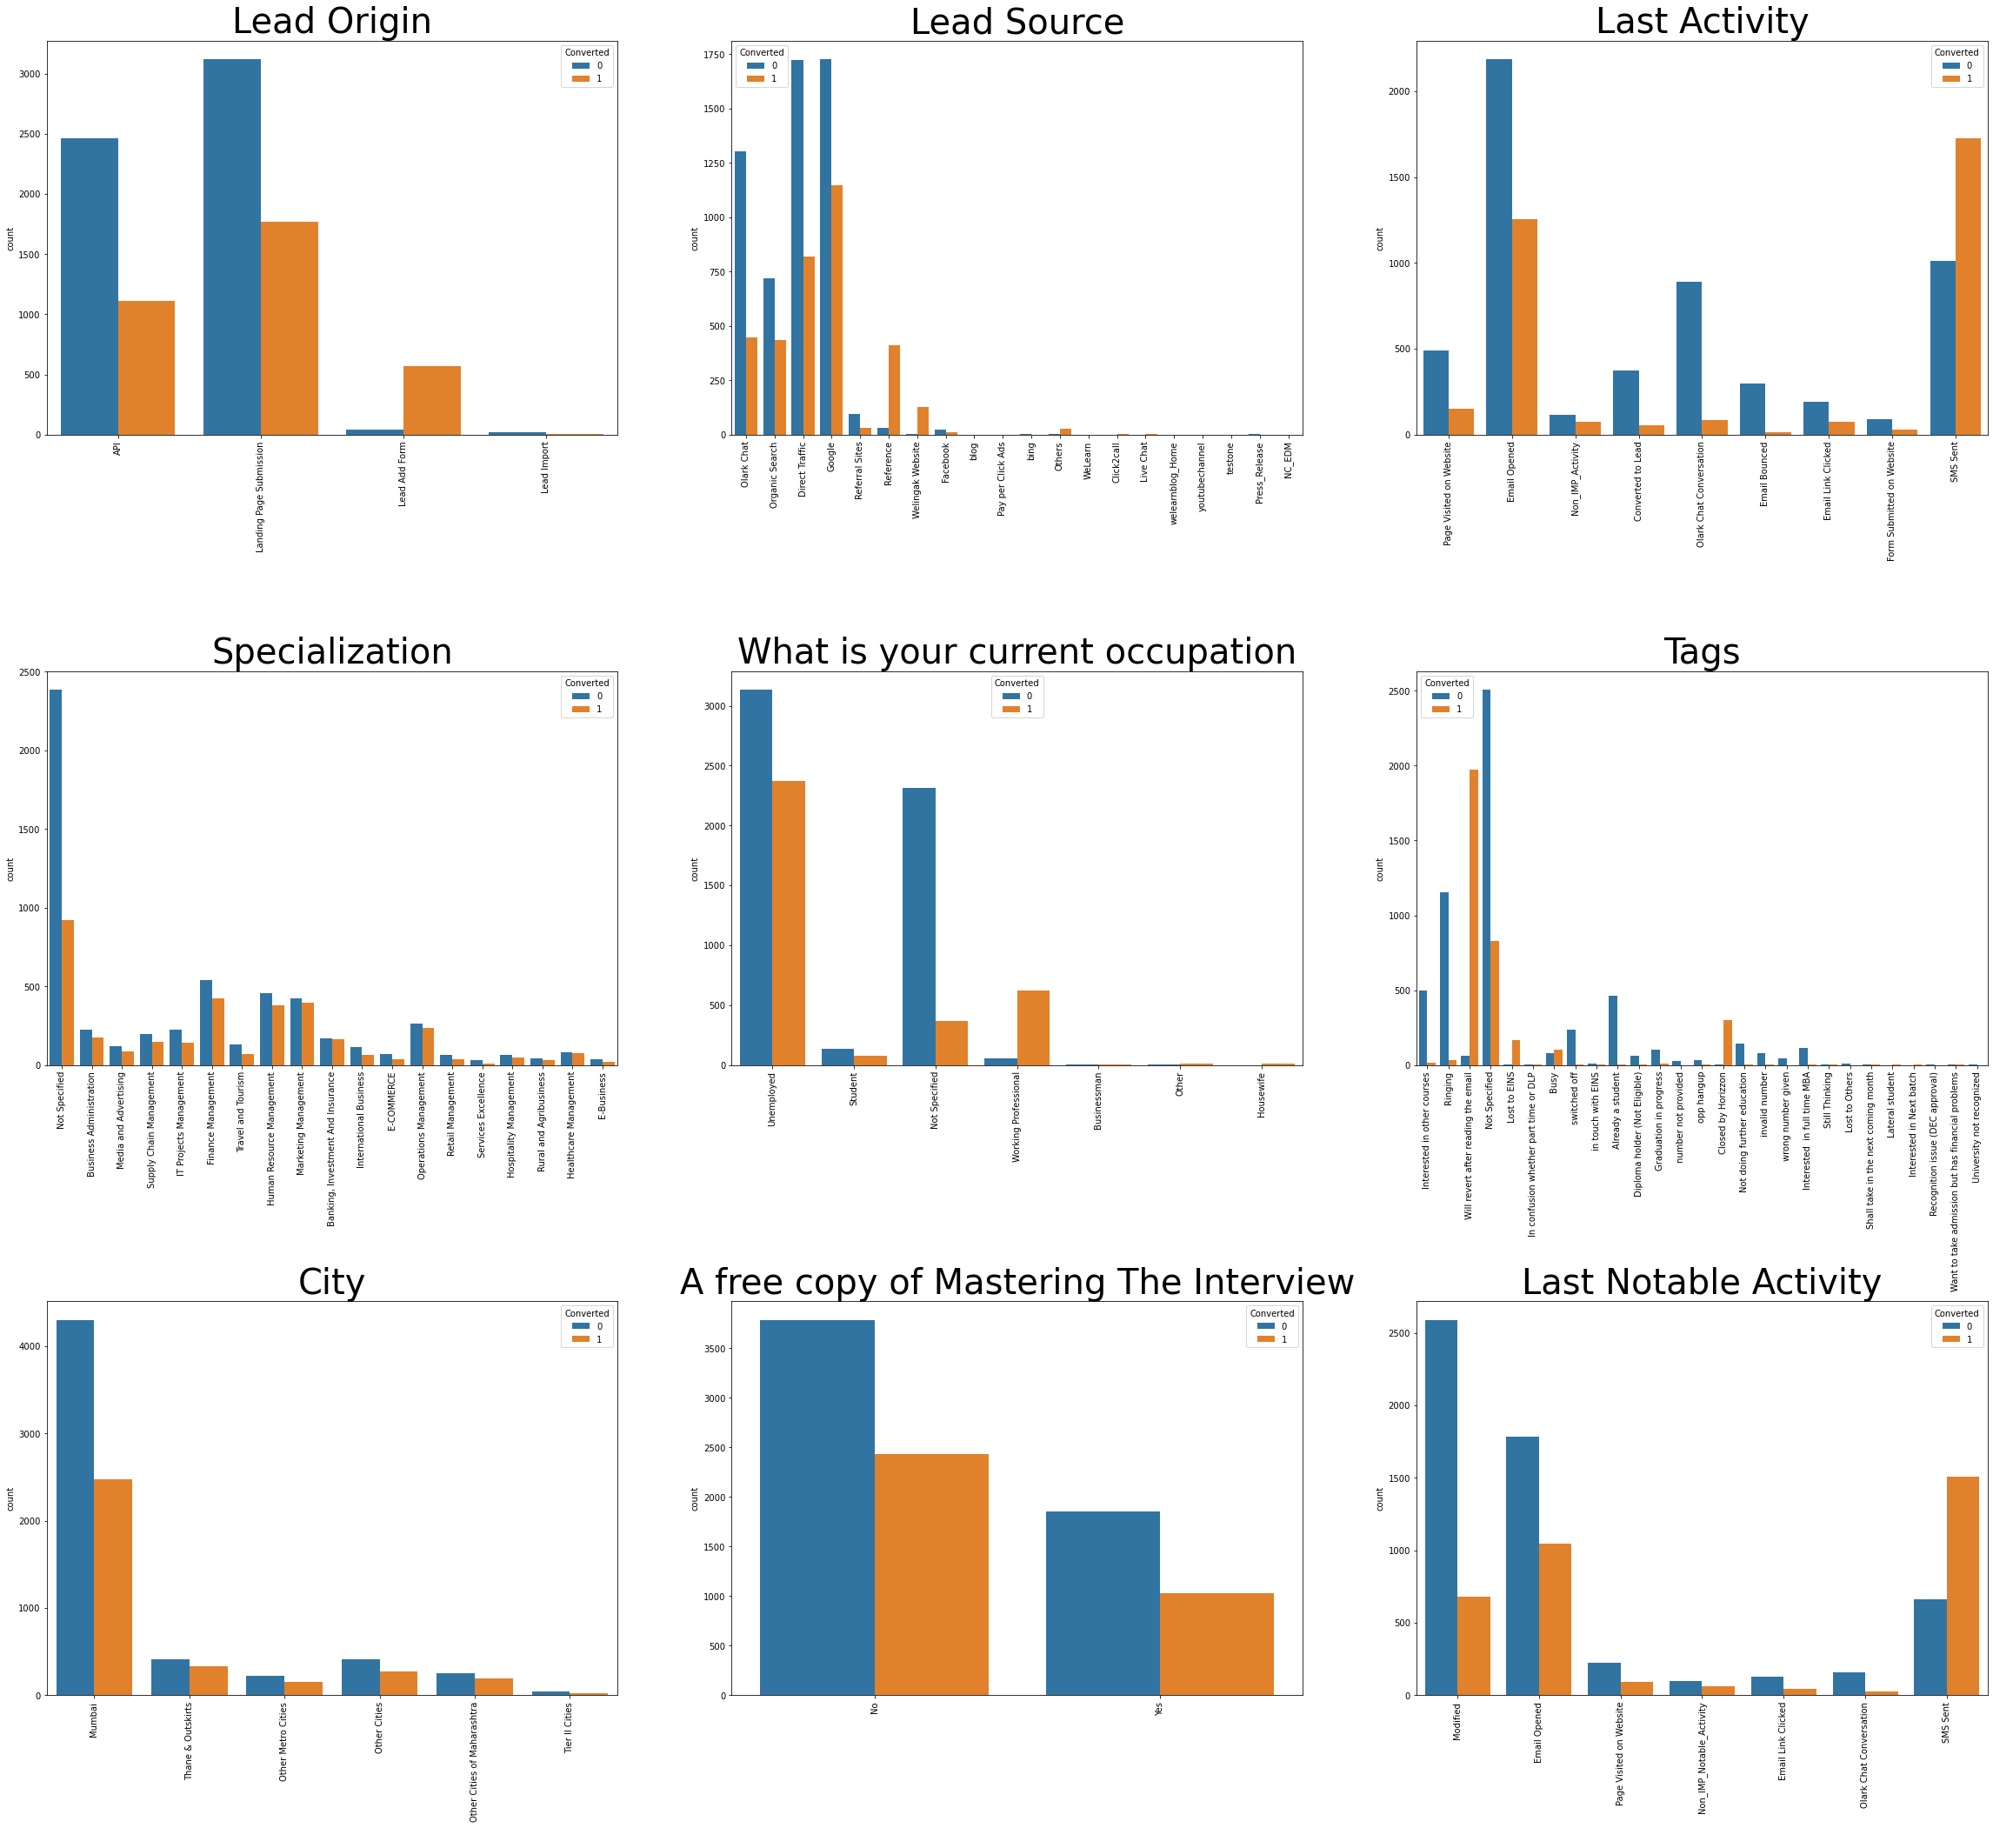

In [1975]:
# Lets plot the countplot for cat_cols1 to see the distribution of values in each column w.r.t target column
fig = plt.figure(figsize=[40,35])
plt.subplots_adjust(hspace=0.6)

for i in enumerate(cat_cols1):
    plt.subplot(3,3,i[0]+1)
    sns.countplot(x=i[1], hue='Converted', data=leads)
    plt.title(i[1], fontdict={'fontsize':40})
    plt.xticks(rotation=90)
    plt.xlabel(' ', fontdict={'fontsize':20})

**From the above subplots we can see that, the most of the leads originated from landing page submission and API out of which the conversion rate of landing page submission is greater than API. The lead add form has more conversion rate than the generation of lead. These origin identifiers will help the organisation to get better lead conversion rate. Olark chat, organic search, direct traffic, google these lead sources can create and able to convert maximum number of leads. The last activity done by the customer i.e email opened, SMS sent create more number of leads and able to convert these leads to take the course. Foccussing more on these last activities of the customer will help to convert the leads. The maximum number of leads created and converted have not specified their specialization. Although, the managment give better results in terms of converting the leads to take the course. Most of the leads converted are unemployed. Focussing more on student and working professionals will give better results. The current status of the lead 'will revert after reading the mail' has more lead conversion rate but not able to create more number of leads. Most of the leads created have not specified their current status. Mumbai city will create maximum number of leads and able to convert them to take a course followed by Thane and other metro cities. The maximum number of leads converted do not want a free copy of mastering the interview. There is a high correlation between last activity and last notable activity.**


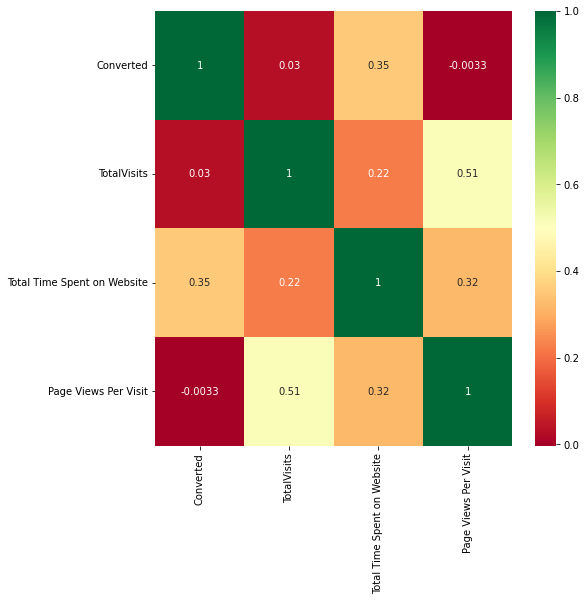

In [1976]:
# Now, check the correlation among the numerical variables using heatmap
plt.figure(figsize=[8,8])
sns.heatmap(leads.corr(), cmap='RdYlGn', annot=True)
plt.show()

**From the heatmap we can see that there is a high correlation between Total visits and Page views per visit.**

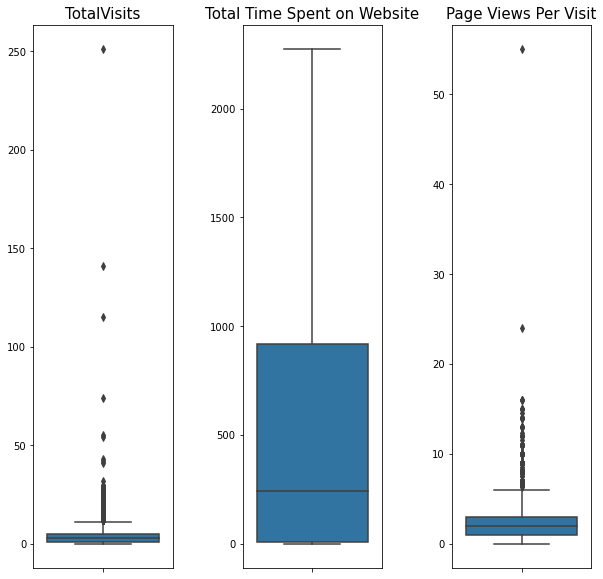

In [1977]:
# Checking the num_cols using box plots
plt.figure(figsize=[10,10])
plt.subplots_adjust(wspace=0.5)
for i, j in zip(num_cols, range(len(num_cols))):
    plt.subplot(1,3,j+1)
    sns.boxplot(y=leads[i])
    plt.title(i, fontdict={'fontsize':15})
    plt.ylabel('')

In [1978]:
# Checking the statistical distribution of num_cols
for i in num_cols:
    print(i)
    print(leads[i].describe(percentiles=[0.25,0.5,0.75,0.9,0.99]))
    print('*-*-*-*-*-*-*-*-*-*-*-*-*-*')

TotalVisits
count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64
*-*-*-*-*-*-*-*-*-*-*-*-*-*
Total Time Spent on Website
count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
25%         9.000000
50%       244.000000
75%       919.500000
90%      1372.000000
99%      1838.960000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64
*-*-*-*-*-*-*-*-*-*-*-*-*-*
Page Views Per Visit
count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64
*-*-*-*-*-*-*-*-*-*-*-*-*-*


**From the above distribution we can see that, the difference between 99% and max value is huge for total visits and page views per visit. This is due to the presence of outliers in those columns. There is no outlier present in the column total time spent on website.**

In [1979]:
# Removing the statistical outliers form above columns
Q1 = leads.TotalVisits.quantile(0.05)
Q3 = leads.TotalVisits.quantile(0.95)
IQR = Q3-Q1
leads = leads[(leads.TotalVisits >= Q1 - 1.5*IQR) & (leads.TotalVisits <= Q3 + 1.5*IQR)]

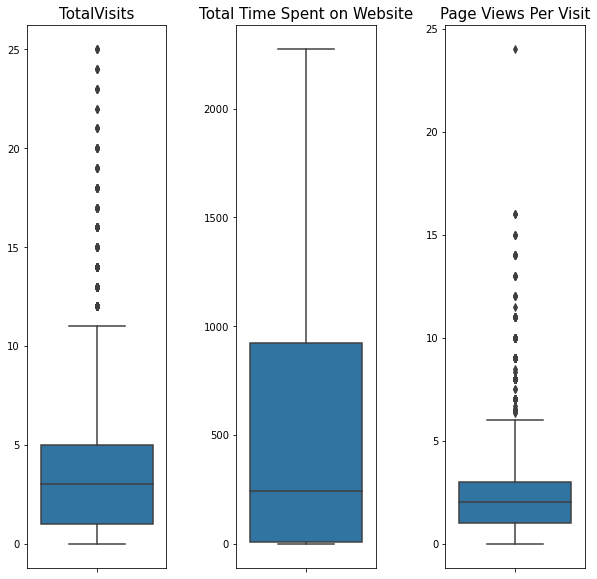

In [1980]:
# Checking the num_cols using box plots after removing outliers
plt.figure(figsize=[10,10])
plt.subplots_adjust(wspace=0.5)
for i, j in zip(num_cols, range(len(num_cols))):
    plt.subplot(1,3,j+1)
    sns.boxplot(y=leads[i])
    plt.title(i, fontdict={'fontsize':15})
    plt.ylabel('')

In [1981]:
# Checking the statistical distribution of num_cols after removing outliers
for i in num_cols:
    print(i)
    print(leads[i].describe(percentiles=[0.25,0.5,0.75,0.9,0.99]))
    print('*-*-*-*-*-*-*-*-*-*-*-*-*-*')
    
leads.info()

TotalVisits
count    9081.000000
mean        3.323753
std         3.306484
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
99%        16.000000
max        25.000000
Name: TotalVisits, dtype: float64
*-*-*-*-*-*-*-*-*-*-*-*-*-*
Total Time Spent on Website
count    9081.000000
mean      481.476599
std       545.363843
min         0.000000
25%         8.000000
50%       244.000000
75%       920.000000
90%      1373.000000
99%      1839.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64
*-*-*-*-*-*-*-*-*-*-*-*-*-*
Page Views Per Visit
count    9081.000000
mean        2.350098
std         2.078922
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
99%         9.000000
max        24.000000
Name: Page Views Per Visit, dtype: float64
*-*-*-*-*-*-*-*-*-*-*-*-*-*
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9081 entries, 0 to 9239
Data columns (total 13 c

**The Outliers are removed and we left with final data with 13 columns for model preparation.**

### 3) MODEL PREPARATION

In [1982]:
# Importing the categorical variables from the data
cat_cols1

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [1983]:
# Mapping the values from 'A free copy of Mastering The Interview' column to 1 and 0s
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].map({'Yes':1, 'No':0})

leads['A free copy of Mastering The Interview'].head()

0    0
1    0
2    1
3    0
4    0
Name: A free copy of Mastering The Interview, dtype: int64

**We can see that, all 'Yes' mapped as 1 and all 'No' mapped as 0.**

In [1984]:
# Lets create dummy variables for remaining categorical columns
dummy1 = pd.get_dummies(leads['Lead Origin'], drop_first=True, prefix= 'Lead Origin')
dummy2 = pd.get_dummies(leads['Lead Source'], drop_first=True, prefix= 'Lead Source')
dummy3 = pd.get_dummies(leads['Last Activity'], drop_first=True, prefix= 'Last Activity')
dummy4 = pd.get_dummies(leads['Specialization'], drop_first=True, prefix= 'Specialization')
dummy5 = pd.get_dummies(leads['What is your current occupation'], drop_first=True, prefix= 'What is your current occupation')
dummy6 = pd.get_dummies(leads['Tags'], drop_first=True, prefix= 'Tags')
dummy7 = pd.get_dummies(leads['City'], drop_first=True, prefix= 'City')
dummy8 = pd.get_dummies(leads['Last Notable Activity'], drop_first=True, prefix= 'Last Notable Activity')

In [1985]:
# Dropping the dummy columns that we imputed as 'Not Specified', 'Others' etc.
dummy4 = dummy4.drop(['Specialization_Not Specified'], axis=1)
dummy2 = dummy2.drop(['Lead Source_Others'], axis=1)
dummy3 = dummy3.drop(['Last Activity_Non_IMP_Activity'], axis=1)
dummy6 = dummy6.drop(['Tags_Not Specified'], axis=1)
dummy8 = dummy8.drop(['Last Notable Activity_Non_IMP_Notable_Activity'], axis=1)
dummy5 = dummy5.drop(['What is your current occupation_Not Specified'], axis=1)

In [1986]:
# Lets concat these dummies with our master data set leads
leads = pd.concat([leads, dummy1], axis=1)
leads = pd.concat([leads, dummy2], axis=1)
leads = pd.concat([leads, dummy3], axis=1)
leads = pd.concat([leads, dummy4], axis=1)
leads = pd.concat([leads, dummy5], axis=1)
leads = pd.concat([leads, dummy6], axis=1)
leads = pd.concat([leads, dummy7], axis=1)
leads = pd.concat([leads, dummy8], axis=1)

In [1987]:
# Popping out the column 'A free copy of Mastering The Interview' from cat_cols1 
cat_cols1.pop(7)

cat_cols1

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'Last Notable Activity']

In [1988]:
# Dropping the original categorical columns from the data
leads.drop(cat_cols1, axis=1, inplace=True)

leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [1989]:
# Checking if any categorical var present in tha data 
leads.info('all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9081 entries, 0 to 9239
Data columns (total 90 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Converted                                               9081 non-null   int64  
 1   TotalVisits                                             9081 non-null   float64
 2   Total Time Spent on Website                             9081 non-null   int64  
 3   Page Views Per Visit                                    9081 non-null   float64
 4   A free copy of Mastering The Interview                  9081 non-null   int64  
 5   Lead Origin_Landing Page Submission                     9081 non-null   uint8  
 6   Lead Origin_Lead Add Form                               9081 non-null   uint8  
 7   Lead Origin_Lead Import                                 9081 non-null   uint8  
 8   Lead Source_Direct Traffic            

**Since there is no var present in the data. We can proceed further for creating Logistic Regression model with this data.**

### 4) LOGISTIC REGRESSION MODEL BUILDING AND EVALUATION

In [1990]:
# Importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
from sklearn import metrics

In [1991]:
# splitting the data into target var and independent var

# Target Variable
y = leads['Converted']

# Independent variable
X = leads.drop('Converted', axis=1)

In [1992]:
# Now, lets split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

**We splitted the data into training and testing sets.**

In [1993]:
# Checking the shape of training and testing data
print('X_train--:', X_train.shape)
print('X_test--:', X_test.shape)
print('y_train--:', y_train.shape)
print('y_test--:', y_test.shape)

X_train--: (6356, 89)
X_test--: (2725, 89)
y_train--: (6356,)
y_test--: (2725,)


In [1994]:
# Lets check the statistical distribution of training data set
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,6356.000000,6356.000000,6356.000000,6356.000000,6356.000000,6356.000000,6356.000000,6356.000000,6356.000000,6356.000000,...,6356.000000,6356.000000,6356.000000,6356.000000,6356.000000,6356.000000,6356.000000,6356.000000,6356.000000,6356.000000
mean,3.311202,471.925897,2.337601,0.322058,0.533826,0.069226,0.003933,0.280680,0.004091,0.314978,...,0.076621,0.049717,0.040434,0.078666,0.008653,0.312303,0.356986,0.020610,0.033826,0.238200
std,3.320689,541.403498,2.076528,0.467302,0.498894,0.253858,0.062597,0.449367,0.063832,0.464544,...,0.266009,0.217376,0.196991,0.269238,0.092627,0.463469,0.479148,0.142087,0.180796,0.426016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,238.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,887.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,25.000000,2272.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**We need to scale the data to bring numeric variables in same range.**

In [1995]:
# Scaling the numeric columns of training data
num_col_train = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[num_col_train] = Scaler.fit_transform(X_train[num_col_train])

X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,6.356000e+03,6.356000e+03,6.356000e+03,6.356000e+03,6356.000000,6356.000000,6356.000000,6356.000000,6356.000000,6356.000000,...,6356.000000,6356.000000,6356.000000,6356.000000,6356.000000,6356.000000,6356.000000,6356.000000,6356.000000,6356.000000
mean,-1.122101e-16,1.004895e-16,-1.144634e-16,1.091358e-15,0.533826,0.069226,0.003933,0.280680,0.004091,0.314978,...,0.076621,0.049717,0.040434,0.078666,0.008653,0.312303,0.356986,0.020610,0.033826,0.238200
std,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,0.498894,0.253858,0.062597,0.449367,0.063832,0.464544,...,0.266009,0.217376,0.196991,0.269238,0.092627,0.463469,0.479148,0.142087,0.180796,0.426016
min,-9.972214e-01,-8.717399e-01,-1.125814e+00,-6.892403e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.960554e-01,-8.661983e-01,-6.442033e-01,-6.892403e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-9.372346e-02,-4.321071e-01,-1.625922e-01,-6.892403e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.086085e-01,7.667235e-01,3.190188e-01,1.450873e+00,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,6.531928e+00,3.325091e+00,6.579962e+00,1.450873e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**All the numeric columns of training data set brought to equal range. Now, lets build the Logistic Regression model using stats model and RFE.**

In [1996]:
# Running the Recursive Feature Elemination algorithm with 20 variables
rfe = RFE(logreg, 20)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [1997]:
# Checking the output 
rfe.support_

array([False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False,  True,  True, False, False,  True, False,  True, False,
        True, False,  True, False,  True, False, False, False, False,
        True, False,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True, False, False, False])

**This is the boolean output given by the RFE for feature selection. Lets combine the data to understand the ranking of features.**

In [1998]:
# Combining the data to see the ranking of features 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 39),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 57),
 ('A free copy of Mastering The Interview', False, 51),
 ('Lead Origin_Landing Page Submission', False, 38),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 27),
 ('Lead Source_Direct Traffic', False, 14),
 ('Lead Source_Facebook', False, 59),
 ('Lead Source_Google', False, 19),
 ('Lead Source_Live Chat', False, 65),
 ('Lead Source_NC_EDM', False, 9),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Pay per Click Ads', False, 64),
 ('Lead Source_Press_Release', False, 47),
 ('Lead Source_Reference', False, 20),
 ('Lead Source_Referral Sites', False, 41),
 ('Lead Source_WeLearn', False, 70),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 31),
 ('Lead Source_blog', False, 45),
 ('Lead Source_testone', False, 69),
 ('Lead Source_welearnblog_Home', False, 52),
 ('Lead Source_yout

In [1999]:
# Selecting the features that are ranked 1 by RFE
features = X_train.columns[rfe.support_]
features

Index(['Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_opp hangup', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Modified'],
      dtype='object')

In [2000]:
# Dropping the columns which are not supported by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
      

In [2001]:
# Adding constant to training data set and fitting the model in GLM
X_train_rfe = X_train[features]

X_train_rfe1 = sm.add_constant(X_train_rfe)
log_model1 = sm.GLM(y_train, X_train_rfe1, family=sm.families.Binomial())
result = log_model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6356
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1314.9
Date:                Mon, 17 Apr 2023   Deviance:                       2629.9
Time:                        03:07:35   Pearson chi2:                 1.24e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2473      0.106    -21.255      0.000      -2.454      -2.040
Lead Origin_Lead Add Form                                0.6866      0.421      1.630      0.103      -0.139       1.512
Lead Source_Olark Chat                                   0.2002      0.123      1.631      0.103      -0.040       0.441
Lead Source_Welingak Website                             2.9476      0.854      3.451      0.001       1.273       4.622
Last Activity_SMS Sent                                   2.4226      0.117     20.661      0.000       2.193       2.652
What is your current occupation_Unemployed               1.5602      0.113     13.747      0.000       1.338       1.783
What is your current occupation_Working Professional     1.5337      0.358      4.287      0.000       0.833       2.235
Tags_Closed by Horizzon                                  6.4015      0.735      8.708      0.000       4.961       7.842
Tags_Diploma holder (Not Eligible)                      -2.9747      1.040     -2.859      0.004      -5.014      -0.936
Tags_Interested  in full time MBA                       -3.1703      1.015     -3.124      0.002      -5.159      -1.181
Tags_Interested in other courses                        -2.2894      0.347     -6.591      0.000      -2.970      -1.609
Tags_Lost to EINS                                        6.2771      0.607     10.339      0.000       5.087       7.467
Tags_Not doing further education                        -3.3240      1.026     -3.239      0.001      -5.336      -1.312
Tags_Ringing                                            -4.2741      0.240    -17.823      0.000      -4.744      -3.804
Tags_Will revert after reading the email                 4.4349      0.214     20.741      0.000       4.016       4.854
Tags_invalid number                                    -26.0992   2.46e+04     -0.001      0.999   -4.83e+04    4.83e+04
Tags_number not provided                               -26.1410   3.99e+04     -0.001      0.999   -7.82e+04    7.82e+04
Tags_opp hangup                                         -1.9924      0.722     -2.758      0.006      -3.408      -0.576
Tags_switched off                                       -4.8698      0.600     -8.117      0.000      -6.046      -3.694
Tags_wrong number given                                -26.0459   3.42e+04     -0.001      0.999    -6.7e+04    6.69e+04
Last Notable Activity_Modified                          -1.8116      0.127    -14.297      0.000      -2.060      -1.563
========================================================================================================================
"""

**The variable that has highest p value should be removed. In above table we can see that, there are three variables that have highest p values. we will not drop these three vars at a single time. Lets drop one of them i.e Tags_Invalid number.**

In [2002]:
# Dropping the var 'Tags_Invalid number' and rebuilding the model
features = features.drop('Tags_invalid number', 1)

X_train_rfe = X_train[features]

X_train_rfe2 = sm.add_constant(X_train_rfe)
log_model2 = sm.GLM(y_train, X_train_rfe2, family=sm.families.Binomial())
result = log_model2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6356
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1362.2
Date:                Mon, 17 Apr 2023   Deviance:                       2724.4
Time:                        03:07:36   Pearson chi2:                 1.10e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2197      0.104    -21.352      0.000      -2.423      -2.016
Lead Origin_Lead Add Form                                0.7721      0.417      1.852      0.064      -0.045       1.589
Lead Source_Olark Chat                                   0.2419      0.121      2.007      0.045       0.006       0.478
Lead Source_Welingak Website                             3.0242      0.850      3.559      0.000       1.359       4.690
Last Activity_SMS Sent                                   2.2929      0.113     20.353      0.000       2.072       2.514
What is your current occupation_Unemployed               1.3779      0.110     12.484      0.000       1.162       1.594
What is your current occupation_Working Professional     1.4197      0.358      3.969      0.000       0.719       2.121
Tags_Closed by Horizzon                                  6.4398      0.733      8.787      0.000       5.003       7.876
Tags_Diploma holder (Not Eligible)                      -2.8105      1.036     -2.713      0.007      -4.841      -0.780
Tags_Interested  in full time MBA                       -3.0209      1.014     -2.979      0.003      -5.009      -1.033
Tags_Interested in other courses                        -2.1344      0.345     -6.191      0.000      -2.810      -1.459
Tags_Lost to EINS                                        6.2566      0.605     10.345      0.000       5.071       7.442
Tags_Not doing further education                        -3.1626      1.023     -3.090      0.002      -5.169      -1.157
Tags_Ringing                                            -4.0207      0.236    -17.035      0.000      -4.483      -3.558
Tags_Will revert after reading the email                 4.5168      0.212     21.315      0.000       4.102       4.932
Tags_number not provided                               -24.8881   2.43e+04     -0.001      0.999   -4.77e+04    4.77e+04
Tags_opp hangup                                         -1.7628      0.714     -2.469      0.014      -3.162      -0.363
Tags_switched off                                       -4.6019      0.598     -7.695      0.000      -5.774      -3.430
Tags_wrong number given                                -24.7909   2.09e+04     -0.001      0.999   -4.09e+04    4.08e+04
Last Notable Activity_Modified                          -1.7451      0.125    -13.985      0.000      -1.990      -1.501
========================================================================================================================
"""

**The variable 'Tags_number not provided' has highest p value. We need to drop this var.**

In [2003]:
# Dropping the var 'Tags_number not provided' and rebuilding the model
features = features.drop('Tags_number not provided', 1)

X_train_rfe = X_train[features]

X_train_rfe3 = sm.add_constant(X_train_rfe)
log_model3 = sm.GLM(y_train, X_train_rfe3, family=sm.families.Binomial())
result = log_model3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6356
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1379.2
Date:                Mon, 17 Apr 2023   Deviance:                       2758.4
Time:                        03:07:36   Pearson chi2:                 1.06e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2145      0.103    -21.404      0.000      -2.417      -2.012
Lead Origin_Lead Add Form                                0.8039      0.415      1.936      0.053      -0.010       1.618
Lead Source_Olark Chat                                   0.2604      0.120      2.174      0.030       0.026       0.495
Lead Source_Welingak Website                             3.0508      0.848      3.598      0.000       1.389       4.713
Last Activity_SMS Sent                                   2.2518      0.111     20.255      0.000       2.034       2.470
What is your current occupation_Unemployed               1.3154      0.109     12.021      0.000       1.101       1.530
What is your current occupation_Working Professional     1.3806      0.358      3.860      0.000       0.680       2.082
Tags_Closed by Horizzon                                  6.4535      0.732      8.815      0.000       5.019       7.888
Tags_Diploma holder (Not Eligible)                      -2.7536      1.034     -2.662      0.008      -4.781      -0.726
Tags_Interested  in full time MBA                       -2.9692      1.014     -2.928      0.003      -4.957      -0.982
Tags_Interested in other courses                        -2.0815      0.344     -6.052      0.000      -2.756      -1.407
Tags_Lost to EINS                                        6.2506      0.604     10.348      0.000       5.067       7.435
Tags_Not doing further education                        -3.1071      1.023     -3.038      0.002      -5.111      -1.103
Tags_Ringing                                            -3.9339      0.235    -16.751      0.000      -4.394      -3.474
Tags_Will revert after reading the email                 4.5471      0.211     21.526      0.000       4.133       4.961
Tags_opp hangup                                         -1.6839      0.711     -2.367      0.018      -3.078      -0.290
Tags_switched off                                       -4.5097      0.597     -7.548      0.000      -5.681      -3.339
Tags_wrong number given                                -23.7032   1.27e+04     -0.002      0.999   -2.49e+04    2.48e+04
Last Notable Activity_Modified                          -1.7174      0.124    -13.828      0.000      -1.961      -1.474
========================================================================================================================
"""

In [2004]:
# Dropping the var 'Tags_wrong number given' and rebuilding the model
features = features.drop('Tags_wrong number given', 1)

X_train_rfe = X_train[features]

X_train_rfe4 = sm.add_constant(X_train_rfe)
log_model4 = sm.GLM(y_train, X_train_rfe4, family=sm.families.Binomial())
result = log_model4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6356
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1399.7
Date:                Mon, 17 Apr 2023   Deviance:                       2799.4
Time:                        03:07:36   Pearson chi2:                 1.02e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2045      0.103    -21.429      0.000      -2.406      -2.003
Lead Origin_Lead Add Form                                0.8431      0.414      2.039      0.041       0.033       1.654
Lead Source_Olark Chat                                   0.2855      0.119      2.400      0.016       0.052       0.519
Lead Source_Welingak Website                             3.0841      0.846      3.644      0.000       1.425       4.743
Last Activity_SMS Sent                                   2.1995      0.110     20.086      0.000       1.985       2.414
What is your current occupation_Unemployed               1.2395      0.108     11.447      0.000       1.027       1.452
What is your current occupation_Working Professional     1.3330      0.358      3.724      0.000       0.632       2.034
Tags_Closed by Horizzon                                  6.4806      0.731      8.861      0.000       5.047       7.914
Tags_Diploma holder (Not Eligible)                      -2.6855      1.033     -2.600      0.009      -4.710      -0.661
Tags_Interested  in full time MBA                       -2.9045      1.014     -2.865      0.004      -4.891      -0.917
Tags_Interested in other courses                        -2.0154      0.343     -5.875      0.000      -2.688      -1.343
Tags_Lost to EINS                                        6.2540      0.603     10.366      0.000       5.072       7.436
Tags_Not doing further education                        -3.0378      1.022     -2.973      0.003      -5.040      -1.035
Tags_Ringing                                            -3.8303      0.233    -16.406      0.000      -4.288      -3.373
Tags_Will revert after reading the email                 4.5888      0.211     21.786      0.000       4.176       5.002
Tags_opp hangup                                         -1.5894      0.708     -2.244      0.025      -2.978      -0.201
Tags_switched off                                       -4.3991      0.597     -7.372      0.000      -5.569      -3.230
Last Notable Activity_Modified                          -1.6993      0.124    -13.759      0.000      -1.941      -1.457
========================================================================================================================
"""

**From above model we can see that, all the variables have p values less than 0.05 which is significant. Lets check the VIF for any correlation between the variables.**

In [2005]:
# Creating the data frame that will contain each feature and its VIF
vif = pd.DataFrame()
vif['Feature'] = X_train[features].columns
vif['VIF'] = [variance_inflation_factor(X_train[features].values,i) for i in range(X_train[features].shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Feature,VIF
2,Lead Source_Welingak Website,1.386466
6,Tags_Closed by Horizzon,1.318309
15,Tags_switched off,1.152031
11,Tags_Not doing further education,1.096347
8,Tags_Interested in full time MBA,1.070674
10,Tags_Lost to EINS,1.069804
7,Tags_Diploma holder (Not Eligible),1.044369
14,Tags_opp hangup,1.018263
5,What is your current occupation_Working Profes...,0.780537
0,Lead Origin_Lead Add Form,0.685418


**The VIF of all the variables are very less i.e there is no redundant variable present in model.**

In [2006]:
# Predicting the values of train set
y_train_pred = result.predict(X_train_rfe4)
y_train_pred.head()

8576    0.997314
6289    0.004423
6450    0.997051
7733    0.997051
7858    0.997051
dtype: float64

In [2007]:
# Creating final predicted training data frame
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_Predicted': y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Predicted,Prospect ID
8576,1,0.997314,8576
6289,0,0.004423,6289
6450,1,0.997051,6450
7733,1,0.997051,7733
7858,1,0.997051,7858


**We can see here, the predicted values of target var are floats. We have to map these values with 0 and 1.**


In [2008]:
# Mapping the values of predicted target var
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Predicted.map(lambda x: 1 if x>=0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Predicted,Prospect ID,Predicted
8576,1,0.997314,8576,1
6289,0,0.004423,6289,0
6450,1,0.997051,6450,1
7733,1,0.997051,7733,1
7858,1,0.997051,7858,1


In [2009]:
# Lets check the performance of model with the help of confusion matrix
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion_matrix)

[[3805  124]
 [ 431 1996]]


In [2010]:
# Lets check the accuracy score of the model
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9126809314033983


**Accuracy is the simplest model evaluation metric for classification problem. It shows the % of correctly predicted labels to the total number of labels. Here we can see, the accuracy obtained is 91%.**

In [2011]:
# Lets check the true positive, true negative, false positive and false negative rate of the model
TP = confusion_matrix[1,1]
TN = confusion_matrix[0,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]

print('TP :', TP)
print('TN :', TN)
print('FP :', FP)
print('FN :', FN)

TP : 1996
TN : 3805
FP : 124
FN : 431


**Good model exibits high TPR and low FPR. We got good prediction with model.**

In [2012]:
# Lets check the Sensitivity and Specificity of the model
Sensitivity = (TP/float(TP+FN))*100
Specificity = (TN/float(TN+FP))*100

print('Sensitivity :', Sensitivity)
print('Specificity :', Specificity)

Sensitivity : 82.24145035022661
Specificity : 96.84398065665563


**Sensitivity is nothing but the TPR. It is the ratio of number of actual YES correctly predicted to the total number of actual YES. Specificity gives the ratio for number of actual NO. The model has a good predictive power.**

In [2013]:
# Creating an ROC curve to see the trade off between Sensitivity & Specificity
def Draw_ROC(actual, predicted):
    tpr, fpr, threshold = metrics.roc_curve(actual, predicted, drop_intermediate=False)
    auccuracy_score = metrics.roc_auc_score(actual, predicted)
    plt.plot(tpr, fpr, label = 'ROC Curve (Area=%0.2f)' % auccuracy_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc='upper right')
    
    return None

tpr, fpr, threshold = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Predicted, drop_intermediate=False)

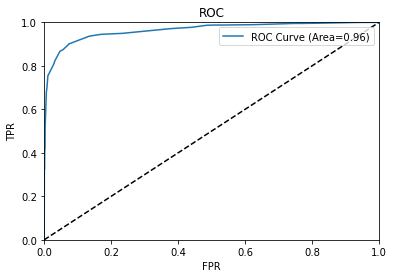

In [2014]:
Draw_ROC(y_train_pred_final.Converted, y_train_pred_final.Converted_Predicted)
plt.show()

**Good ROC curve touches the upper left corner of the graph as we can see above. Higher the area under the curve of ROC better is the model.  We got area = 0.96 indicating a good predictive model.**

In [2015]:
# Lets find the optimal cutoff point by creating columns with different probability cutoffs
prob_cutoff = [float(x/10) for x in range(10)]
for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final.Converted_Predicted.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Converted,Converted_Predicted,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
8576,1,0.997314,8576,1,1,1,1,1,1,1,1,1,1,1
6289,0,0.004423,6289,0,1,0,0,0,0,0,0,0,0,0
6450,1,0.997051,6450,1,1,1,1,1,1,1,1,1,1,1
7733,1,0.997051,7733,1,1,1,1,1,1,1,1,1,1,1
7858,1,0.997051,7858,1,1,1,1,1,1,1,1,1,1,1


**Different probability cutoffs are created and added to the final predicted training data set of target variable.**

In [2016]:
# Checking Accuracy, Sensitivity and Specificty for various probability cutoffs
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])

prob_cutoff = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in prob_cutoff:
    conf_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total = sum(sum(conf_matrix))
    
    acc = (conf_matrix[1,1] + conf_matrix[0,0])/total
    sens = conf_matrix[1,1]/(conf_matrix[1,1] + conf_matrix[1,0])
    spec = conf_matrix[0,0]/(conf_matrix[0,0] + conf_matrix[0,1])
    
    cutoff_df.loc[i] = [i, acc, sens, spec]

cutoff_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.381844,1.000000,0.000000
0.1,0.1,0.836847,0.949320,0.767371
0.2,0.2,0.893329,0.935311,0.867396
0.3,0.3,0.916614,0.900288,0.926699
0.4,0.4,0.919761,0.868150,0.951642
0.5,0.5,0.912681,0.822415,0.968440
0.6,0.6,0.909220,0.809642,0.970730
0.7,0.7,0.908748,0.807581,0.971240
0.8,0.8,0.898678,0.752369,0.989056
0.9,0.9,0.875393,0.685208,0.992874


**Cutoff dataframe is created which consist of columns 'prob', 'accuracy', 'sensitivity', 'specificity' of each of the probability cutoff value.**

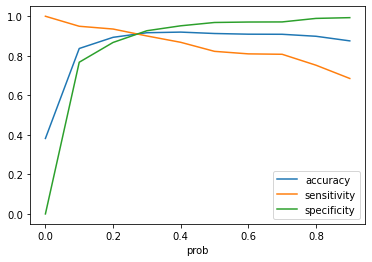

In [2017]:
# Plotting the graph of 'probability' vs 'accuracy', 'sensitivity', 'specificity' 
cutoff_df.plot.line(x = 'prob', y = ['accuracy', 'sensitivity', 'specificity'])
plt.show()

**From above curve we can see, the optimal probability cutoff point is 0.27.**

In [2018]:
# Changing the y_train_pred_final with optimal prob cutoff point
y_train_pred_final['final_pred'] = y_train_pred_final.Converted_Predicted.map(lambda x: 1 if x > 0.27 else 0)
y_train_pred_final.head()

,Converted,Converted_Predicted,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_pred
8576,1,0.997314,8576,1,1,1,1,1,1,1,1,1,1,1,1
6289,0,0.004423,6289,0,1,0,0,0,0,0,0,0,0,0,0
6450,1,0.997051,6450,1,1,1,1,1,1,1,1,1,1,1,1
7733,1,0.997051,7733,1,1,1,1,1,1,1,1,1,1,1,1
7858,1,0.997051,7858,1,1,1,1,1,1,1,1,1,1,1,1


In [2019]:
# Lets add the column 'Lead Score' in the final training data frame
y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_Predicted.map(lambda x: round(x*100))
y_train_pred_final[['Converted', 'Converted_Predicted', 'Prospect ID', 'final_pred', 'Lead Score']].head()

,Converted,Converted_Predicted,Prospect ID,final_pred,Lead Score
8576,1,0.997314,8576,1,100
6289,0,0.004423,6289,0,0
6450,1,0.997051,6450,1,100
7733,1,0.997051,7733,1,100
7858,1,0.997051,7858,1,100


**Lead score is assigned to each of the lead besed on which we can decide which lead will likely to convert to take the course.**

In [2020]:
# Lets check the performance of the model with the help of confusion matrix
confusion_matrix1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_pred)
confusion_matrix1

array([[3408,  521],
       [ 157, 2270]], dtype=int64)

In [2021]:
# Lets check the true positive, true negative, false positive and false negative rate of the model
TP1 = confusion_matrix1[1,1]
TN1 = confusion_matrix1[0,0]
FP1 = confusion_matrix1[0,1]
FN1 = confusion_matrix1[1,0]

print('TP1 :', TP1)
print('TN1 :', TN1)
print('FP1 :', FP1)
print('FN1 :', FN1)

TP1 : 2270
TN1 : 3408
FP1 : 521
FN1 : 157


In [2022]:
# Lets check the final overall 'accuracy', 'sensitivity', 'specificity' of the model
accr = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_pred)
print('acc_score :', accr*100)

Sensitivity = (TP1/float(TP1+FN1))*100
Specificity = (TN1/float(TN1+FP1))*100

print('Sensitivity :', Sensitivity)
print('Specificity :', Specificity)

acc_score : 89.33291378225299
Sensitivity : 93.53110836423568
Specificity : 86.73962840417408


### OBSERVATIONS :

**The model is performing pritty good with gini 0.96. For the training data set we got the following observations:**

In [2023]:
print('acc_score :', round(accr*100, 2))
print('Sensitivity :', round(Sensitivity, 2))
print('Specificity :', round(Specificity, 2))

acc_score : 89.33
Sensitivity : 93.53
Specificity : 86.74


### 5) PREDICTIONS ON THE TEST DATA

In [2024]:
# Scaling the numerical columns of test data
num_col_test = X_test.select_dtypes(include=['int64', 'float64']).columns
num_col_test

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [2025]:
X_test[num_col_test] = Scaler.transform(X_test[num_col_test])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1580,4.122600,-0.679631,0.511663,1.450873,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6533,-0.997221,-0.871740,-1.125814,-0.689240,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7267,2.014438,1.640447,1.282241,-0.689240,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2747,0.207443,-0.509689,0.800630,1.450873,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2192,-0.093723,-0.121778,-0.403398,1.450873,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [2026]:
# Lets select the columns of training data set for test data set
X_train_rfe4_new = X_train_rfe4.drop(['const'], axis=1)
X_test = X_test[X_train_rfe4_new.columns]

# Adding constant to test data
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off,Last Notable Activity_Modified
1580,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6533,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7267,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2747,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2192,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [2027]:
# Predicting the test data
y_test_pred = result.predict(X_test_sm)

# Converting it to data frame
y_test_pred_final = pd.DataFrame(y_test_pred)

# Converting y_test to Dataframe
y_test_df = pd.DataFrame(y_test)

# Adding prospect ID column to y test df as an index
y_test_df['Prospect ID'] = y_test_df.index

In [2028]:
# Checking the two data frames 
print(y_test_pred_final.head())

print()

print(y_test_df.head())

             0
1580  0.099350
6533  0.127972
7267  0.974013
2747  0.099350
2192  0.084800

      Converted  Prospect ID
1580          0         1580
6533          0         6533
7267          1         7267
2747          0         2747
2192          0         2192


In [2029]:
# Removing their indices to concat them 
y_test_pred_final.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Concatinating the two data frames
y_pred_final = pd.concat([y_test_pred_final, y_test_df], axis=1)
y_pred_final.head()

,0,Converted,Prospect ID
0,0.099350,0,1580
1,0.127972,0,6533
2,0.974013,1,7267
3,0.099350,0,2747
4,0.084800,0,2192


In [2030]:
# Renaming the column
y_pred_final = y_pred_final.rename(columns={0 : 'Converted_prob'})
y_pred_final.head()

,Converted_prob,Converted,Prospect ID
0,0.099350,0,1580
1,0.127972,0,6533
2,0.974013,1,7267
3,0.099350,0,2747
4,0.084800,0,2192


In [2031]:
# Adding the column Lead Score to test data set
y_pred_final['Lead Score'] = y_pred_final.Converted_prob.map(lambda x: round(x*100))

# Adding column final_prediction 
y_pred_final['final_prediction'] = y_pred_final.Converted_prob.map(lambda x: 1 if x>0.27 else 0)

y_pred_final.head()

,Converted_prob,Converted,Prospect ID,Lead Score,final_prediction
0,0.099350,0,1580,10,0
1,0.127972,0,6533,13,0
2,0.974013,1,7267,97,1
3,0.099350,0,2747,10,0
4,0.084800,0,2192,8,0


In [2032]:
# Lets check the overall accuracy 
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_prediction)

0.8913761467889908

In [2033]:
# Lets check the performance of the model by using confusion matrix
confusion_matrix2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_prediction)
confusion_matrix2

array([[1476,  221],
       [  75,  953]], dtype=int64)

In [2034]:
# Lets check the true positive, true negative, false positive and false negative rate of the model
TP2 = confusion_matrix2[1,1]
TN2 = confusion_matrix2[0,0]
FP2 = confusion_matrix2[0,1]
FN2 = confusion_matrix2[1,0]

print('TP2 :', TP2)
print('TN2 :', TN2)
print('FP2 :', FP2)
print('FN2 :', FN2)

TP2 : 953
TN2 : 1476
FP2 : 221
FN2 : 75


In [2035]:
# Lets check the final overall 'accuracy', 'sensitivity', 'specificity' of the model
accr = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_prediction)
print('acc_score :', accr*100)

Sensitivity = (TP2/float(TP2+FN2))*100
Specificity = (TN2/float(TN2+FP2))*100

print('Sensitivity :', Sensitivity)
print('Specificity :', Specificity)

acc_score : 89.13761467889908
Sensitivity : 92.70428015564202
Specificity : 86.97701826753094


### OBSERVATIONS :

**After running the model on testing data set we get the following observations:**


In [2036]:
print('acc_score :', round(accr*100, 2))
print('Sensitivity :', round(Sensitivity, 2))
print('Specificity :', round(Specificity, 2))

acc_score : 89.14
Sensitivity : 92.7
Specificity : 86.98


### FINAL OBSERVATION :

### TRAIN DATA

**acc_score : 89.33
Sensitivity : 93.53
Specificity : 86.74**

### TEST DATA

**acc_score : 89.14
Sensitivity : 92.7
Specificity : 86.98**


**The model seems to predict the conversion rate very well. Focussing more on the sources of leads like Direct Traffic, last notable activity like olark chat conversation or paying attension on the current status of the customer will provide better results.**